In [1]:
import csv
import sys
import pandas as pd
csv.field_size_limit(sys.maxsize)
def load_csv():
    with open('DBPEDIA_train.csv') as file:
        data = pd.read_csv(file)
        
        print('\n'+'*'*80 )
        print('Printing Text Data')
        print('*'*80 + '\n')
        working_data = data['text'].head()
        print(working_data)
        print('*'*80)
        text = []
        text_text = []
        text_labels = []
        set_labels=set()
        count = 0
        text_text = data.iloc[:,0]
        print(text_text.astype)
        text_labels = data.iloc[:,1]

        for row in text_labels:
            set_labels.add(row)
        
        print('\n'+'*'*80 )
        print('Printing Distinct Labels')
        print('*'*80 + '\n')
        print(set_labels)
        print(len(set_labels))
       
        return(text_text.astype(str),text_labels)
load_csv()


********************************************************************************
Printing Text Data
********************************************************************************

0    William Alexander Massey (October 7, 1856 – Ma...
1    Lions is the sixth studio album by American ro...
2    Pirqa (Aymara and Quechua for wall, hispaniciz...
3    Cancer Prevention Research is a biweekly peer-...
4    The Princeton University Chapel is located on ...
Name: text, dtype: object
********************************************************************************
<bound method NDFrame.astype of 0         William Alexander Massey (October 7, 1856 – Ma...
1         Lions is the sixth studio album by American ro...
2         Pirqa (Aymara and Quechua for wall, hispaniciz...
3         Cancer Prevention Research is a biweekly peer-...
4         The Princeton University Chapel is located on ...
                                ...                        
240937    Charlie Thompson is a prominent j

(0         William Alexander Massey (October 7, 1856 – Ma...
 1         Lions is the sixth studio album by American ro...
 2         Pirqa (Aymara and Quechua for wall, hispaniciz...
 3         Cancer Prevention Research is a biweekly peer-...
 4         The Princeton University Chapel is located on ...
                                 ...                        
 240937    Charlie Thompson is a prominent journalist in ...
 240938    The Northerly Stakes is a Perth Racing Group 3...
 240939    HC Empor Rostock is a team handball club from ...
 240940    University of Surabaya (UBAYA) is a university...
 240941    The 1981 Seattle Seahawks season was the team'...
 Name: text, Length: 240942, dtype: object,
 0                Agent
 1                 Work
 2                Place
 3                 Work
 4                Place
               ...     
 240937           Agent
 240938           Event
 240939           Agent
 240940           Agent
 240941    SportsSeason
 Name: l1, Length: 24

In [ ]:
conda install pytorch cpuonly -c pytorch -y

Solving environment: done

## Package Plan ##

  environment location: /home/ranjan/anaconda3

  added / updated specs:
    - cpuonly
    - pytorch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytorch-1.5.0              |      py3.7_cpu_0        90.5 MB  pytorch
    ------------------------------------------------------------
                                           Total:        90.5 MB

The following NEW packages will be INSTALLED:

  cpuonly            pytorch/noarch::cpuonly-1.0-0
  ninja              pkgs/main/linux-64::ninja-1.9.0-py37hfd86e86_0
  pytorch            pytorch/linux-64::pytorch-1.5.0-py3.7_cpu_0



pytorch-1.5.0        | 90.5 MB   | #######################7              |  64% 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set_style(style = 'whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

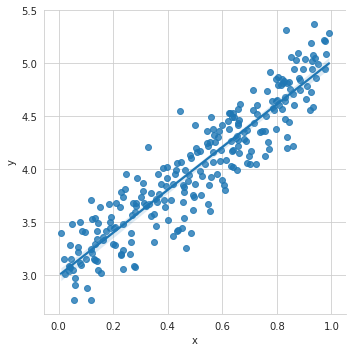

In [11]:
m = 2 # slope
c = 3 # interceptm = 2 # slope
c = 3 # intercept
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = x * m + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x ='x', y ='y', data = df)

In [13]:
import torch
import torch.nn as nn
from torch.autograd import Variable
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

class LinearRegressionModel(nn.Module):
   def __init__(self, input_dim, output_dim):
      super(LinearRegressionModel, self).__init__()
      self.linear = nn.Linear(input_dim, output_dim)

   def forward(self, x):
      out = self.linear(x)
      return out
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
input_dim, output_dim(1, 1)
model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
[w, b] = model.parameters()

def get_param_values():
   return w.data[0][0], b.data[0]

def plot_current_fit(title = ""):
    plt.figure(figsize = (12,4))
    plt.title(title)
    plt.scatter(x, y, s = 8)
    w1 = w.data[0][0]
    b1 = b.data[0]
    x1 = np.array([0., 1.])
    y1 = x1 * w1 + b1
    plt.plot(x1, y1, 'r', label = 'Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()
plot_current_fit('Before training')

TypeError: 'int' object is not callable

In [16]:
import torch
from torchtext import data

import pandas as pd
import numpy as np

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchtext

import spacy

from torch.autograd import Variable

import time
import copy
from torch.optim import lr_scheduler

from sklearn.model_selection import train_test_split
from torchtext.vocab import Vectors, GloVe
from matplotlib.pyplot import plot, hist, xlabel, legend

In [17]:
train_data = pd.read_csv("DBPEDIA_train.csv")
train_data.head()

,text,l1,l2,l3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding


In [21]:
import re
url = re.compile(r'https?://\S+|www\.\S+')
train = train_data['text'].apply(lambda tweet: url.sub(r'',tweet))
train=train.str.lower().str.replace("[^a-z]", " ")
tokenized_train = train.apply(lambda tweet: tweet.split())

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

tokenized_train = tokenized_train.apply(lambda tweet: [lem.lemmatize(word) for word in tweet if word not in stop_words])
#tokenized_test = tokenized_test.apply(lambda tweet: [lem.lemmatize(word) for word in tweet if word not in stop_words])

[nltk_data] Downloading package stopwords to /home/ranjan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ranjan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [23]:
detokenized_train = [] 
for i in range(len(train)): 
    t = ' '.join(tokenized_train[i]) 
    detokenized_train.append(t) 

# detokenized_test = [] 
# for i in range(len(test)): 
#     t = ' '.join(tokenized_test[i]) 
#     detokenized_test.append(t) 

train_data['text'] = detokenized_train
# test_data['text'] = detokenized_test
train_data.head()

,text,l1,l2,l3
0,william alexander massey october march united ...,Agent,Politician,Senator
1,lion sixth studio album american rock band bla...,Work,MusicalWork,Album
2,pirqa aymara quechua wall hispanicized spellin...,Place,NaturalPlace,Mountain
3,cancer prevention research biweekly peer revie...,Work,PeriodicalLiterature,AcademicJournal
4,princeton university chapel located university...,Place,Building,HistoricBuilding


In [24]:
train = train_data[['text', 'l2']]
#test = test_data[['text']]
X = train['text']
y = train['l2']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)

